In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import random
from random import Random

np.random.seed(66)


In [2]:
def signFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return signFunction((np.matmul(X,W)+b)[0])

dados = pd.read_csv("Data.csv")
# Dados criados (linearmente separáveis)


In [7]:
X = np.array(dados[['RendaMensal','GastoComOutrasFinanciadoras']].copy())
y = np.array(dados['Aprovacao'].copy())
dados
# Os critérios usados para ilustrar a aprovação de emprestivo são a Renda Mensal e o pagamento com outras financiadoreas. Os dados foram normalizados para realizamos os calculos.

,RendaMensal,GastoComOutrasFinanciadoras,Aprovacao
0,0.70944,0.86473,1
1,0.81839,0.05693,0
2,0.21227,0.94476,1
3,0.12407,0.45928,0
4,0.33267,0.76819,1
...,...,...,...
62,0.81246,0.05755,0
63,0.59383,0.16372,0
64,0.50764,0.39340,0
65,0.27941,0.61134,0


In [4]:

def perceptron(X, y, W, b, learn_rate = 0.01):

  for i in range(len(X)):
    pred = prediction(X[i],W,b)
    if (pred-y[i]) < 0:
      for k in range(len(X[0])):
            W[k] = W[k] + (learn_rate*X[i][k])
            b = b + learn_rate
    elif (pred- y[i]) > 0:
          for k in range(len(X[0])):
            W[k] = W[k] - (learn_rate*X[i][k])
            b = b - learn_rate

  return W, b

In [5]:
def treinar(X, y, learn_rate = 0.01, num_epochs = 25):
  #Para melhor visualização do ajuste, somamos o bias com o maior valor do vetor x.
  x_max = max(X.T[0])
  W = np.array(np.random.rand(2,1))
  b = np.random.rand(1)[0] + x_max

  vetor_linhas = [] #Vetor que contém os coeficientes (novos pesos) de cada reta
  for i in range(num_epochs):

    W, b = perceptron(X, y, W, b, learn_rate)
    coeficiente_angular = -W[0]/W[1]
    coeficiente_linear = -b/W[len(X[0])-1]
    vetor_linhas.append((coeficiente_angular, coeficiente_linear ))

  return vetor_linhas 


 Epoca :  1


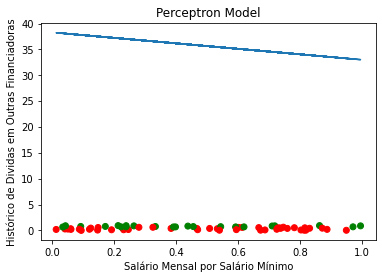


 Epoca :  2


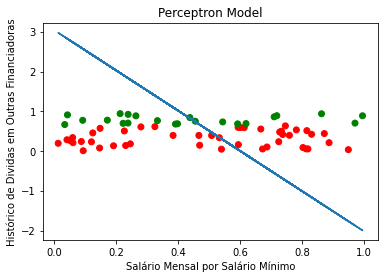


 Epoca :  3


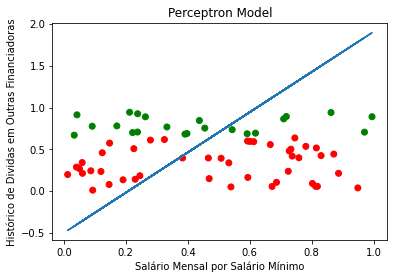


 Epoca :  4


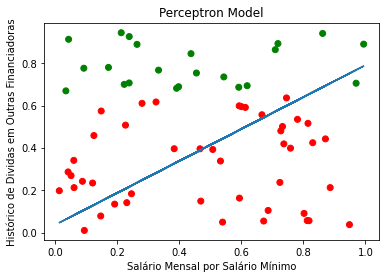


 Epoca :  5


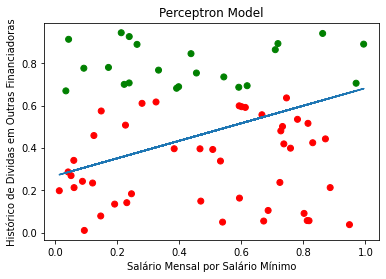


 Epoca :  6


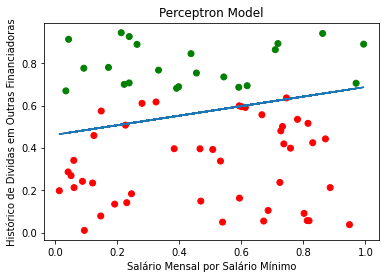


 Epoca :  7


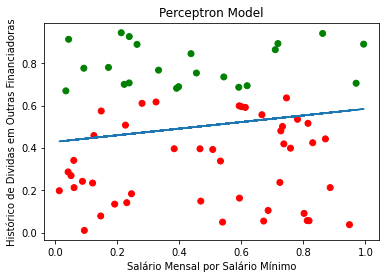


 Epoca :  8


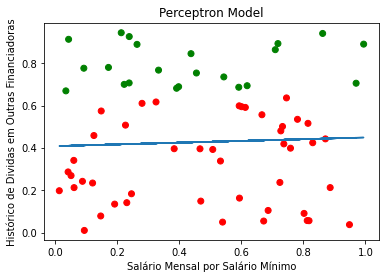


 Epoca :  9


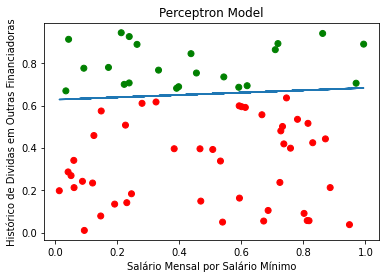


 Epoca :  10


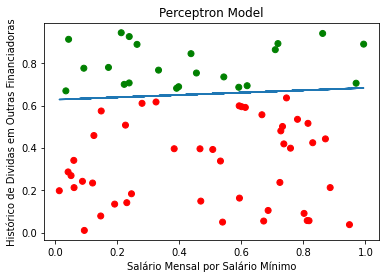


 Epoca :  11


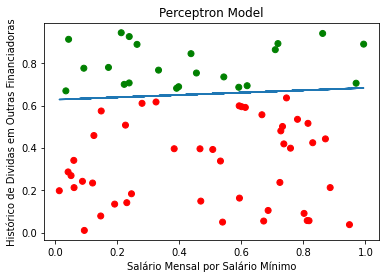


 Epoca :  12


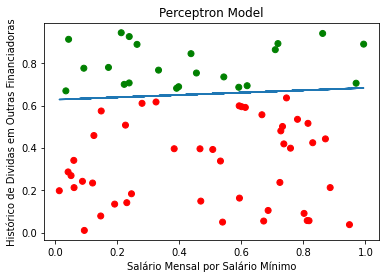


 Epoca :  13


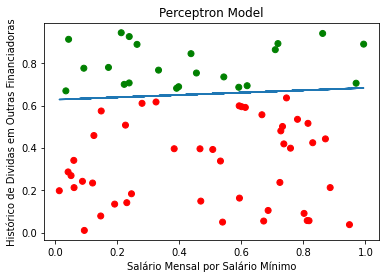


 Epoca :  14


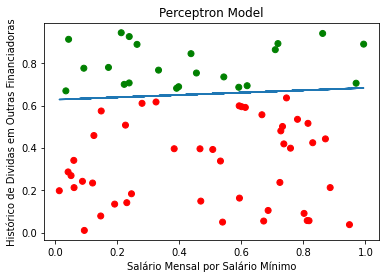


 Epoca :  15


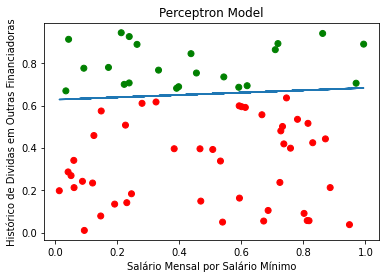


 Epoca :  16


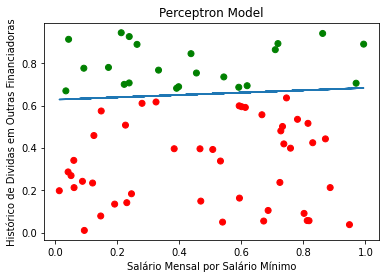


 Epoca :  17


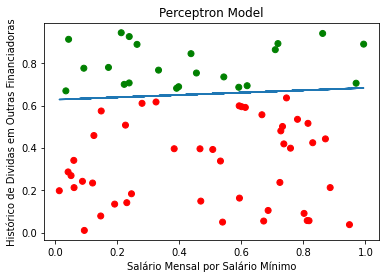


 Epoca :  18


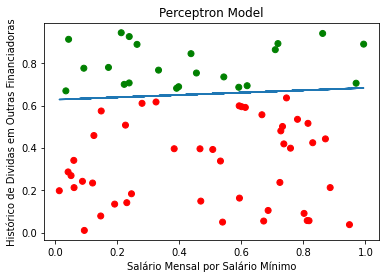


 Epoca :  19


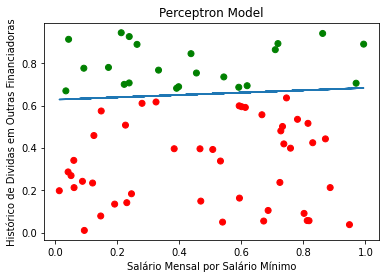


 Epoca :  20


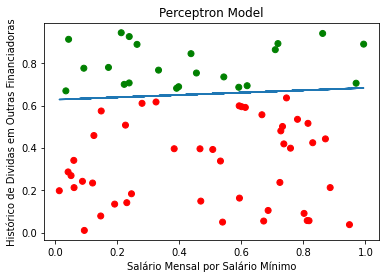


 Epoca :  21


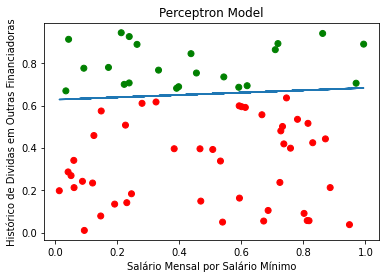


 Epoca :  22


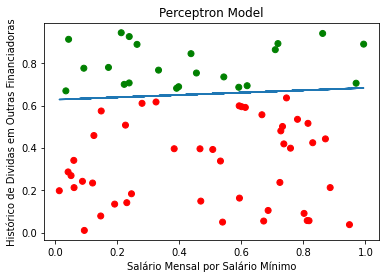


 Epoca :  23


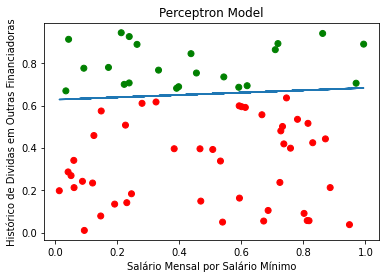


 Epoca :  24


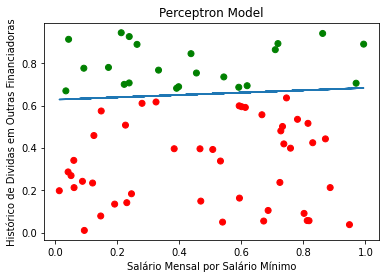


 Epoca :  25


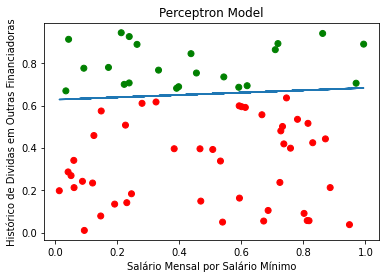

In [6]:
vetor_linhas = treinar(X,y)
i = np.array(dados['RendaMensal'])
j = np.array(dados['GastoComOutrasFinanciadoras'])
df = pd.DataFrame({"Status": y})

def cor_do_ponto(valor: int) -> str:
    """Retorna a cor de um ponto do gráfico, de acordo com o seu valor."""
    if valor == 0:
        return "red"
    else:
        return "green"

df['Color'] = df['Status'].apply(cor_do_ponto)

for k in range(len(vetor_linhas)):
  plt.scatter(i, j, c=df['Color'])
  plt.xlabel("Salário Mensal por Salário Mínimo")
  plt.ylabel("Histórico de Dividas em Outras Financiadoras")
  plt.title("Perceptron Model") 
  y = vetor_linhas[k][0]*i + vetor_linhas[k][1]
  plt.plot(i,y)
  print("\n Epoca : ",k+1)
  plt.show()
  
# Vermelho = crédito não aprovado
# Verde = crédito aprovado

